## **🗽United States of America Cities Monthly Temperature Forecasting.**

This notebook is part of our proposed solution for the NASA Mission Pale Blue Dot Visualization Challenge. Our goal is to construct a suite of models that predict the average monthly temperatures in U.S. cities to achieve the highest possible performance.

The study utilizes the Land Surface Temperature By City dataset, published by Berkeley Earth on Kaggle, which provides a robust foundation for our analysis and model development by providing comprehensive temperature records for cities around the world.

By using this data, we aim to produce accurate, reliable forecasts that can contribute to our understanding of climate trends and inform future climate-related decisions and policies. Please note that the dataset used in this study can be accessed via the link provided below.


Dataset: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data


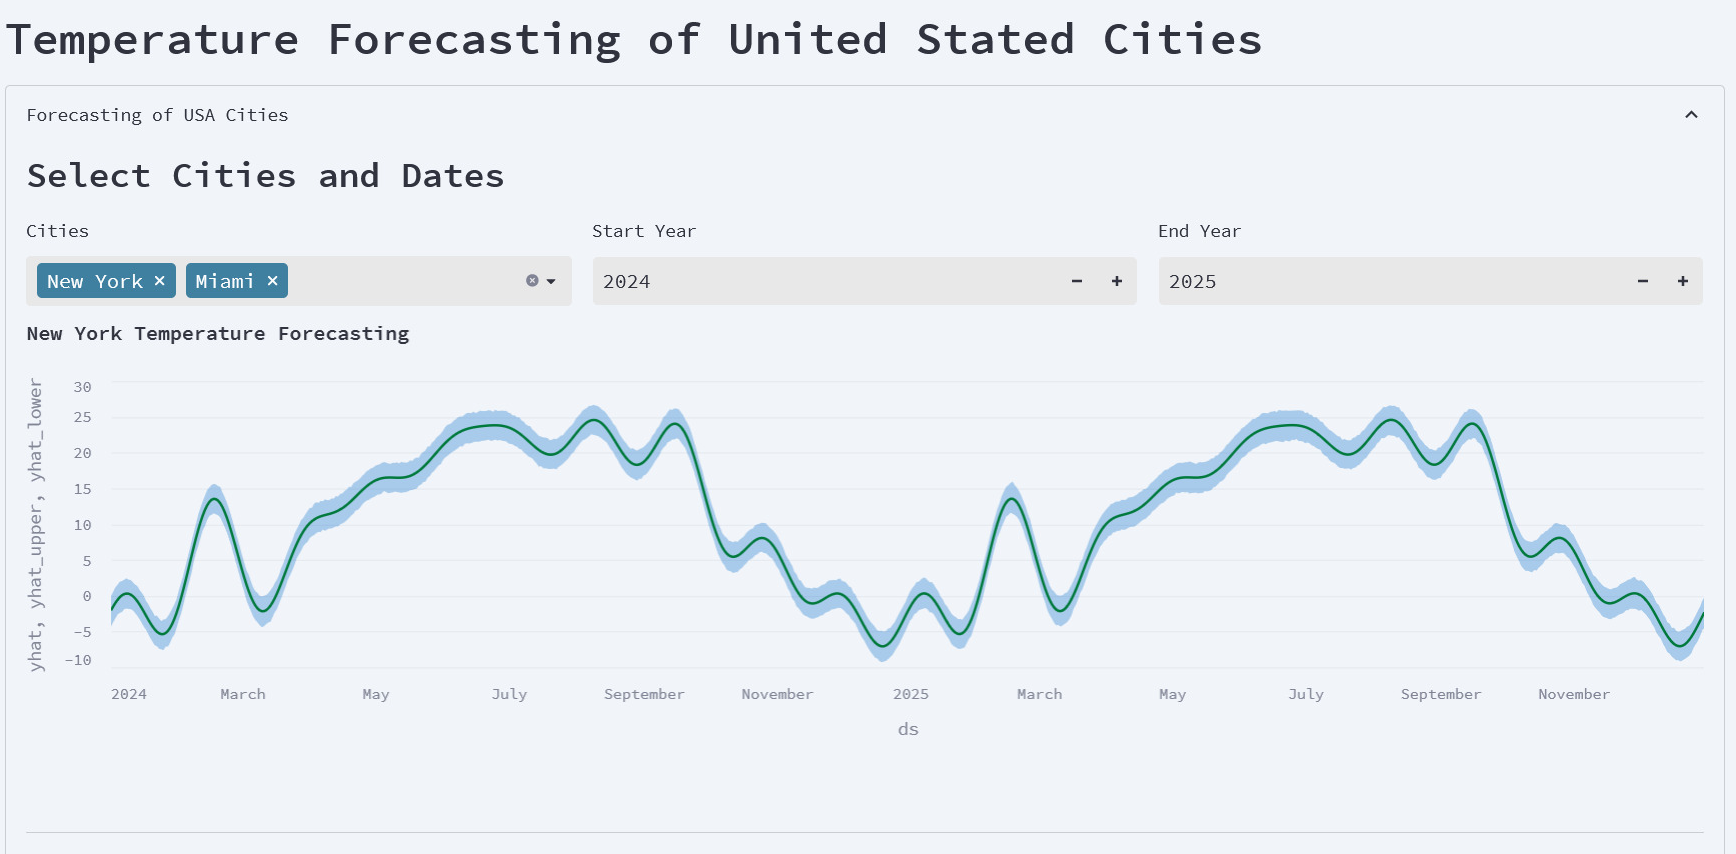

In [3]:
from PIL import Image
img = Image.open('../Images/NY Forecasting.png')
img

---

### **Imports**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
sns.set_theme()

### **Data Loading & First Preprocessing**

In [41]:
df = pd.read_csv('../Dataset/Temperature/GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


### **Data Pre-Processing**

In [42]:
df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

Since data previus to 1970 were not fully collected for every cities, we will only work with data from 1970 forward.

In [43]:
# Date to Datetime
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['dt'].dt.year >= 1970]
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2714,1970-01-01,-3.488,0.327,Århus,Denmark,57.05N,10.33E
2715,1970-02-01,-4.962,0.582,Århus,Denmark,57.05N,10.33E
2716,1970-03-01,0.361,0.367,Århus,Denmark,57.05N,10.33E
2717,1970-04-01,3.350,0.296,Århus,Denmark,57.05N,10.33E
2718,1970-05-01,11.343,0.311,Århus,Denmark,57.05N,10.33E


In the filtered data set (1970-forward), there are several instances of NaN values. To address this issue, the fill_nan_values function enables the imputation of missing values using the mean as the criterion.

In [44]:
df.isna().sum()

dt                                  0
AverageTemperature               3070
AverageTemperatureUncertainty    3070
City                                0
Country                             0
Latitude                            0
Longitude                           0
dtype: int64

In [45]:
def fill_nan_values(df):
    # To Datetime
    df['dt'] = pd.to_datetime(df['dt'])
    
    # Month Attribute
    df['Month'] = df['dt'].dt.month
    
    # Calculate Mean grouped by City Country Month
    avg_temp = df.groupby(['City', 'Country', 'Month'])['AverageTemperature'].transform('mean')
    avg_temp_unc = df.groupby(['City', 'Country', 'Month'])['AverageTemperatureUncertainty'].transform('mean')
    
    # Impute NaN Values
    df['AverageTemperature'].fillna(avg_temp, inplace=True)
    df['AverageTemperatureUncertainty'].fillna(avg_temp_unc, inplace=True)
    
    return df


In [46]:
df = fill_nan_values(df)
df.isna().any()

dt                               False
AverageTemperature               False
AverageTemperatureUncertainty    False
City                             False
Country                          False
Latitude                         False
Longitude                        False
Month                            False
dtype: bool

After imputation there is no missing values in the data.

In [47]:
# String Coordinate to Real Coordinates
def convert_coordinates(coord):
    direction = {'N':1, 'S':-1, 'E':1, 'W':-1}
    if isinstance(coord, str): # Comprueba si la coordenada es una cadena
        if coord[-1] in direction: 
            return direction[coord[-1]]*float(coord[:-1])
    return coord

In [48]:
# Apply Coordinate Converter
df['Latitude'] = df['Latitude'].apply(convert_coordinates)
df['Longitude'] = df['Longitude'].apply(convert_coordinates)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
2714,1970-01-01,-3.488,0.327,Århus,Denmark,57.05,10.33,1
2715,1970-02-01,-4.962,0.582,Århus,Denmark,57.05,10.33,2
2716,1970-03-01,0.361,0.367,Århus,Denmark,57.05,10.33,3
2717,1970-04-01,3.350,0.296,Århus,Denmark,57.05,10.33,4
2718,1970-05-01,11.343,0.311,Århus,Denmark,57.05,10.33,5


#### **Saving Preprocessed Data**

In [49]:
df.to_csv('WorldData.csv')

#### **Data Selection (USA Cities)**

In [50]:
countries = df['Country'].unique()
print(countries)
len(countries)

['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada' "Côte D'Ivoire" 'United Kingdom' 'Saudi Arabia'
 'Japan' 'United States' 'India' 'Benin' 'United Arab Emirates' 'Mexico'
 'Venezuela' 'Ghana' 'Ethiopia' 'Australia' 'Yemen' 'Indonesia' 'Morocco'
 'Pakistan' 'France' 'Libya' 'Burma' 'Brazil' 'South Africa' 'Syria'
 'Egypt' 'Algeria' 'Netherlands' 'Malaysia' 'Portugal' 'Ecuador' 'Italy'
 'Uzbekistan' 'Philippines' 'Madagascar' 'Chile' 'Belgium' 'El Salvador'
 'Romania' 'Peru' 'Colombia' 'Tanzania' 'Tunisia' 'Turkmenistan' 'Israel'
 'Eritrea' 'Paraguay' 'Greece' 'New Zealand' 'Vietnam' 'Cameroon' 'Iraq'
 'Afghanistan' 'Argentina' 'Azerbaijan' 'Moldova' 'Mali'
 'Congo (Democratic Republic Of The)' 'Thailand'
 'Central African Republic' 'Bosnia And Herzegovina' 'Bangladesh'
 'Switzerland' 'Equatorial Guinea' 'Cuba' 'Lebanon' 'Mozambique' 'Serbia'
 'Angola' 'Somalia' 'Norway' 'Nepal' 'Poland' 'Ukraine' 'Guinea Bissau'
 'Malawi' 'Burkina Faso' 'Slov

159

In [51]:
cities = df['City'].unique()
print(cities)
len(cities)

['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']


3448

In [52]:
# Filtering Main Countries
paises = ['United States', 'Canada', 'Mexico', 'Cuba', 'Russia', 'China', 
          'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 
          'Belgium', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Poland', 
          'Austria', 'Ireland', 'Portugal', 'Greece']

df = df[df['Country'].isin(paises)]

In [53]:
cities = df['City'].unique()
print(cities)
len(cities)

['Århus' 'Ürümqi' 'A Coruña' ... 'Zunyi' 'Zurich' 'Zwolle']


1283

In [54]:
location_df = df[['City', 'Country', 'Latitude', 'Longitude']].drop_duplicates()
location_df.head()

,City,Country,Latitude,Longitude
2714,Århus,Denmark,57.05,10.33
13718,Ürümqi,China,44.20,87.20
16957,A Coruña,Spain,42.59,-8.73
20196,Aachen,Germany,50.63,6.34
23435,Aalborg,Denmark,57.05,10.33


In [55]:
city_df = df[['dt','AverageTemperature', 'City', 'Country']]
city_df.head()

,dt,AverageTemperature,City,Country
2714,1970-01-01,-3.488,Århus,Denmark
2715,1970-02-01,-4.962,Århus,Denmark
2716,1970-03-01,0.361,Århus,Denmark
2717,1970-04-01,3.350,Århus,Denmark
2718,1970-05-01,11.343,Århus,Denmark


In [56]:
city_df.tail()

,dt,AverageTemperature,City,Country
8599207,2013-05-01,11.46400,Zwolle,Netherlands
8599208,2013-06-01,15.04300,Zwolle,Netherlands
8599209,2013-07-01,18.77500,Zwolle,Netherlands
8599210,2013-08-01,18.02500,Zwolle,Netherlands
8599211,2013-09-01,14.50893,Zwolle,Netherlands


In [57]:
city_df = city_df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})
city_df.head()

,ds,y,City,Country
2714,1970-01-01,-3.488,Århus,Denmark
2715,1970-02-01,-4.962,Århus,Denmark
2716,1970-03-01,0.361,Århus,Denmark
2717,1970-04-01,3.350,Århus,Denmark
2718,1970-05-01,11.343,Århus,Denmark


In [58]:
us_cities_df = city_df[city_df['Country'] == 'United States']

In [59]:
us_cities_df

,ds,y,City,Country
49355,1970-01-01,3.969,Abilene,United States
49356,1970-02-01,8.463,Abilene,United States
49357,1970-03-01,9.217,Abilene,United States
49358,1970-04-01,16.835,Abilene,United States
49359,1970-05-01,21.172,Abilene,United States
...,...,...,...,...
8439242,2013-05-01,15.544,Yonkers,United States
8439243,2013-06-01,20.892,Yonkers,United States
8439244,2013-07-01,24.722,Yonkers,United States
8439245,2013-08-01,21.001,Yonkers,United States


### **Model Building**

In [60]:
train_city= us_cities_df[us_cities_df['ds'].dt.year < 2010]
test_city = us_cities_df[us_cities_df['ds'].dt.year >= 2010]

In [61]:
import joblib
from prophet import Prophet
from tqdm import tqdm


# Training Function
def train_models(us_cities_df):
    models = {}
    for city in tqdm(us_cities_df['City'].drop_duplicates().values):
        city_df = us_cities_df[us_cities_df['City'] == city]
        m = Prophet()
        m.fit(city_df)
        models[city] = m
    return models

# Save Models Function
def save_models(models, filename):
    joblib.dump(models, filename)

# FLoad Models Function
def load_models(filename):
    return joblib.load(filename)

In [62]:
# Train Models
models = train_models(train_city)

  0%|          | 0/248 [00:00<?, ?it/s]11:10:31 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/248 [00:00<00:44,  5.53it/s]11:10:31 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/248 [00:00<00:43,  5.69it/s]11:10:31 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 3/248 [00:00<00:43,  5.65it/s]11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/248 [00:00<00:45,  5.35it/s]11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 5/248 [00:00<00:44,  5.46it/s]11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 6/248 [00:01<00:45,  5.32it/s]1

In [63]:
save_models(models, 'models.joblib')

In [64]:
loaded_models = load_models('models.joblib')

### **Model Performance Assesment**

In [65]:
def predict_future(model, df, periods):
    future = df[['ds']]  # Solo usa las fechas en tu dataframe filtrado
    future = future.append(future.tail(1).assign(ds=lambda x: x.ds + pd.DateOffset(days=1)).tail(periods), ignore_index=True)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

def predict_long_future(model, df, start_year=2010, end_year=2018):
    # Crea un dataframe con todas las fechas desde start_year hasta end_year
    future_dates = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31')
    future = pd.DataFrame(future_dates, columns=['ds'])

    # Haz la predicción
    forecast = model.predict(future)
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


def plot_comparison(df, predicciones, column, city):
    city_filter = df['City'] == city
    df = df[city_filter]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['ds'], df[column], label='Real')
    ax.plot(predicciones['ds'], predicciones['yhat'], label='Forecasting', color='green')
    ax.fill_between(predicciones['ds'], 
                    predicciones['yhat_lower'], 
                    predicciones['yhat_upper'], 
                    color='gray', alpha=0.3)

    ax.set_title(f'{city} Temperature Forecasting')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    ax.legend()
    plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error

def calculate_mean_mae(models, test_city, periods=30):
    maes = []
    
    for city in models.keys():
        # Obtén el modelo y los datos de prueba para la ciudad dada
        city_model = models[city]
        test_city_df = test_city[test_city['City'] == city]
        
        # Haz la predicción
        forecast = predict_future(city_model, test_city_df[:-1], periods)

        # Calcula el MAE para esta ciudad
        mae = mean_absolute_error(test_city_df['y'], forecast['yhat'])
        maes.append(mae)
    
    # Calcula y devuelve el MAE promedio
    return sum(maes) / len(maes)


In [71]:
def calculate_mean_mse(models, test_city, periods=30):
    mses = []
    
    for city in models.keys():
        # Obtén el modelo y los datos de prueba para la ciudad dada
        city_model = models[city]
        test_city_df = test_city[test_city['City'] == city]
        
        # Haz la predicción
        forecast = predict_future(city_model, test_city_df[:-1], periods)

        # Calcula el MAE para esta ciudad
        mse = mean_squared_error(test_city_df['y'], forecast['yhat'])
        mses.append(mse)
    
    # Calcula y devuelve el MAE promedio
    return sum(mses) / len(mses)

### Multiple Cities Forecasting

In [72]:
def forecast_and_plot(city, models, test_city, periods=30): 
    city_model = models[city]
    test_city_df = test_city[test_city['City'] == city]
    forecast = predict_future(city_model, test_city_df, periods)
    plot_comparison(test_city, forecast, 'y', city)
    return forecast


In [73]:
main_cities = ['New York', 'Washington', 'Los Angeles', 'Las Vegas', 'Miami']

Mean Absolute Error Across All Forecasting Models: 1.534
Mean Squared Error Across All Forecasting Models: 7.311


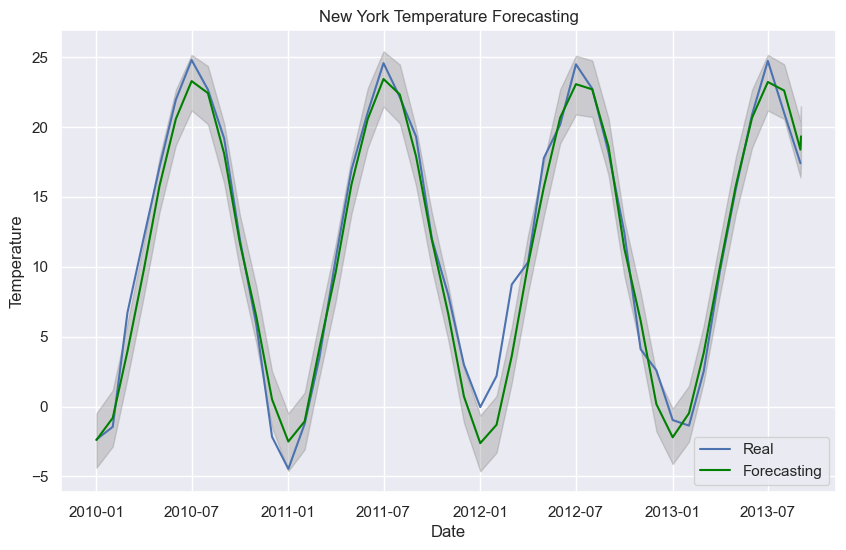

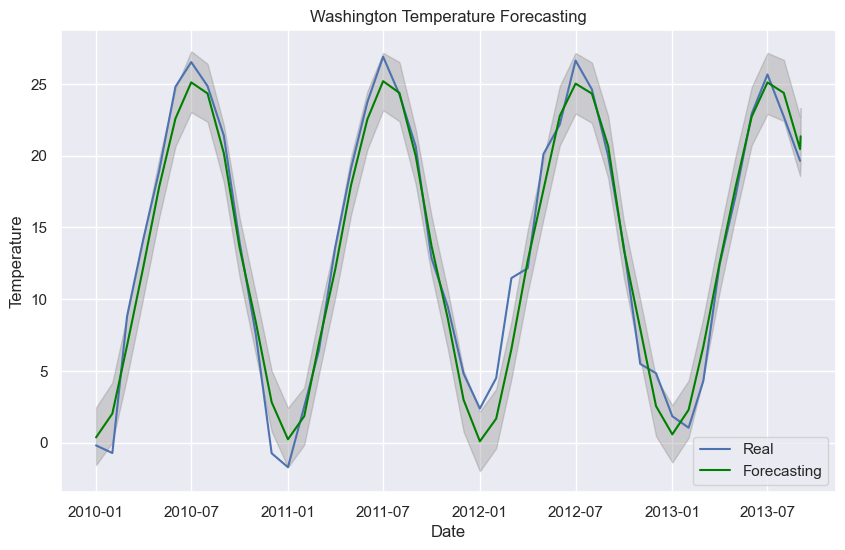

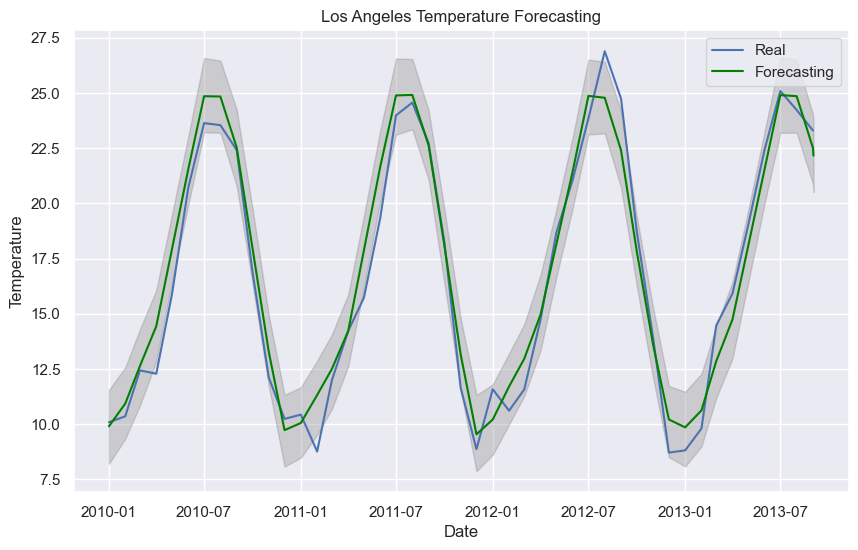

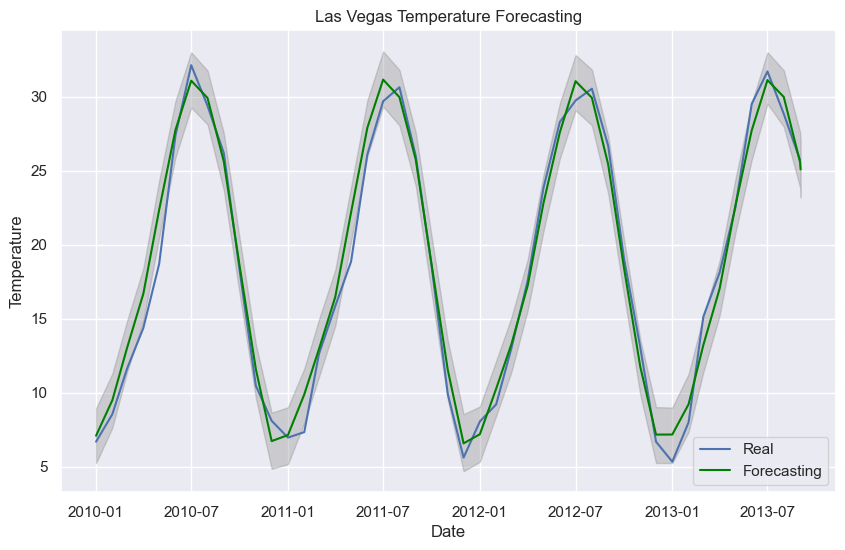

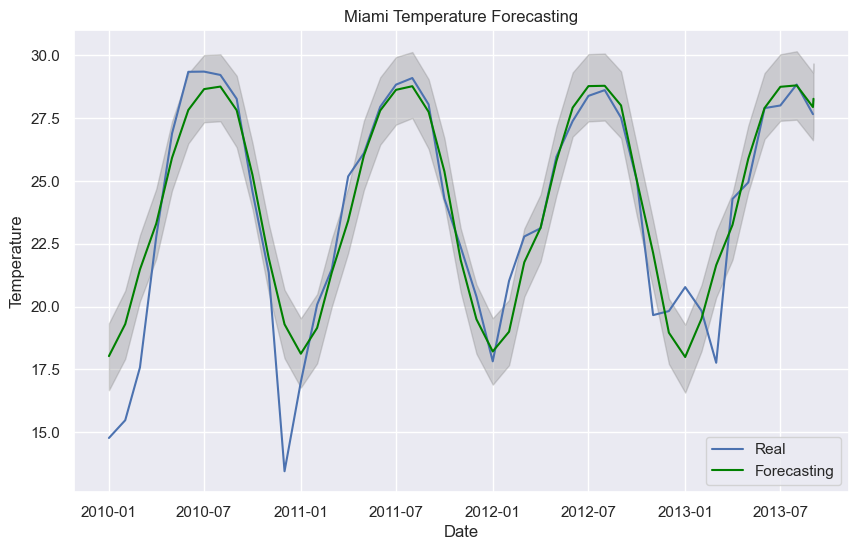

In [74]:
mae = calculate_mean_mae(models, test_city)
print(f'Mean Absolute Error Across All Forecasting Models: {round(mae,3)}') 
mse = calculate_mean_mse(models, test_city)
print(f'Mean Squared Error Across All Forecasting Models: {round(mse,3)}') 
for city in main_cities:
    forecast = forecast_and_plot(city, models, test_city)